<a href="https://colab.research.google.com/github/MBABHISHEK/NoteMaker/blob/main/NoteMaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vosk
from vosk import Model, KaldiRecognizer

In [2]:
FRAME_RATE = 16000
CHANNELS=1

model = Model(model_name="vosk-model-en-us-0.22")
# For a smaller download size, use model = Model(model_name="vosk-model-small-en-us-0.15")
rec = KaldiRecognizer(model, FRAME_RATE)
rec.SetWords(True)

In [3]:
!pip install pydub

In [4]:
from pydub import AudioSegment

In [5]:
mp3 = AudioSegment.from_mp3("ttsMP3.com_VoiceText_2024-6-3_13-4-34.mp3")
mp3 = mp3.set_channels(CHANNELS)
mp3 = mp3.set_frame_rate(FRAME_RATE)


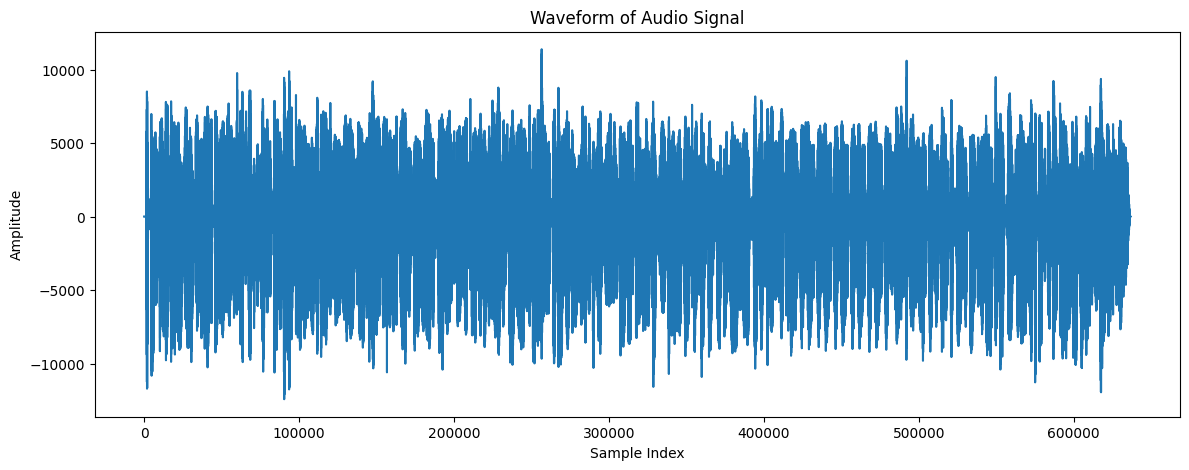

<ipython-input-6-7de6425c6466>:41: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='gouraud')


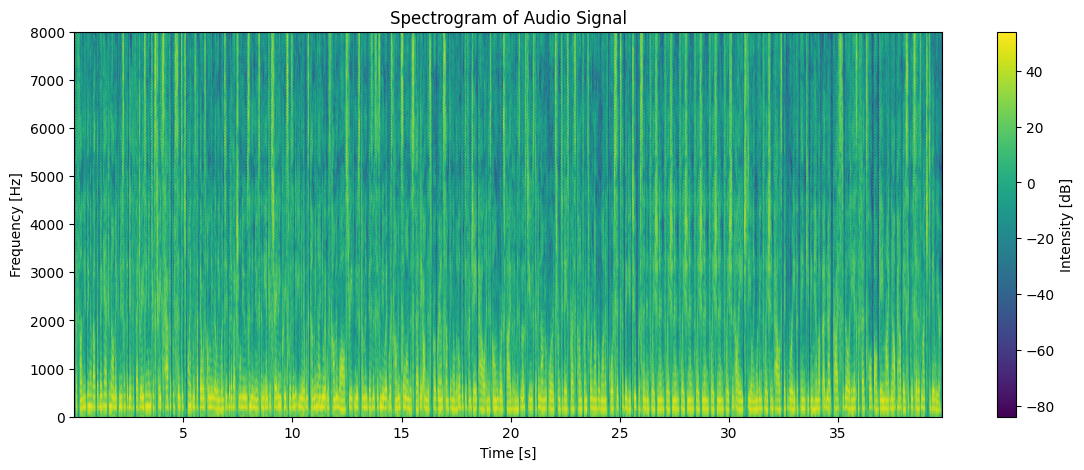

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from pydub import AudioSegment
import io
import wave

# Load the MP3 file
mp3 = AudioSegment.from_mp3("ttsMP3.com_VoiceText_2024-6-3_13-4-34.mp3")

# Set the desired number of channels and frame rate
CHANNELS = 1  # Mono
FRAME_RATE = 16000  # 16kHz
mp3 = mp3.set_channels(CHANNELS)
mp3 = mp3.set_frame_rate(FRAME_RATE)

# Convert to WAV format in memory
wav_io = io.BytesIO()
mp3.export(wav_io, format="wav")
wav_io.seek(0)

# Open the WAV data
wf = wave.open(wav_io, 'rb')

# Read the audio data for plotting
frames = wf.readframes(wf.getnframes())
audio_data = np.frombuffer(frames, dtype=np.int16)

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(audio_data)
plt.title("Waveform of Audio Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

# Plot the spectrogram
frequencies, times, spectrogram_data = spectrogram(audio_data, FRAME_RATE)

plt.figure(figsize=(14, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of Audio Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()


In [7]:
rec.AcceptWaveform(mp3.raw_data)
result = rec.Result()

In [8]:
import json
text = json.loads(result)["text"]

In [9]:
text

"the funny thing about the big economic news of the day the fed raising interest rates half a percentage point was that there was only really wanted bit of actual news in the news and the interest rate increase wasn't it you knew it was coming i knew it was common wall street news come and businesses knew it was coming so on this fair day on this program something a little bit different j power in his own words five of 'em his most used economic words from today's press conference were number one of course it's the biggie two percent inflation inflation inflation inflation inflation inflation lh dealing with inflation palace big worry the thing keeping him up at night price stability as the fed's whole ballgame right now power basically said as much to do"

In [ ]:
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

In [24]:
# Sample text to translate
text_to_translate =text

# Initialize translator
translator = Translator()

# Translate text to Kannada
translated_kannada = translator.translate(text_to_translate, dest='kn').text
print("Translated to Kannada:", translated_kannada)

# Translate text to Hindi
translated_hindi = translator.translate(text_to_translate, dest='hi').text
print("Translated to Hindi:", translated_hindi)


Translated to Kannada: ಫೆಡ್ ಬಡ್ಡಿದರಗಳನ್ನು ಅರ್ಧ ಶೇಕಡಾವಾರು ಹೆಚ್ಚಿಸುವ ದಿನದ ದೊಡ್ಡ ಆರ್ಥಿಕ ಸುದ್ದಿಗಳ ಬಗ್ಗೆ ತಮಾಷೆಯ ಸಂಗತಿಯೆಂದರೆ, ಸುದ್ದಿಯಲ್ಲಿ ನಿಜವಾಗಿಯೂ ನಿಜವಾದ ಸುದ್ದಿಗಳನ್ನು ಬಯಸಿದೆ ಮತ್ತು ಬಡ್ಡಿದರ ಹೆಚ್ಚಳವು ನನಗೆ ತಿಳಿದಿರಲಿಲ್ಲ ಎಂದು ನಿಮಗೆ ತಿಳಿದಿರಲಿಲ್ಲಇದು ಸಾಮಾನ್ಯ ವಾಲ್ ಸ್ಟ್ರೀಟ್ ಸುದ್ದಿಗಳು ಬರುತ್ತವೆ ಮತ್ತು ವ್ಯವಹಾರಗಳು ಈ ಕಾರ್ಯಕ್ರಮದಲ್ಲಿ ಈ ನ್ಯಾಯಯುತ ದಿನದಂದು ತನ್ನದೇ ಆದ ಮಾತುಗಳಲ್ಲಿ ಸ್ವಲ್ಪ ವಿಭಿನ್ನವಾದ ಜೆ ಶಕ್ತಿ ಎಂದು ತಿಳಿದಿತ್ತುಇದು ಬಿಗ್ಗಿ ಎರಡು ಪ್ರತಿಶತ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಪ್ಯಾಲೇಸ್‌ನೊಂದಿಗೆ ವ್ಯವಹರಿಸುತ್ತದೆ ದೊಡ್ಡ ಚಿಂತೆ ಅವನನ್ನು ರಾತ್ರಿಯ ಬೆಲೆಯ ಸ್ಥಿರತೆಯಲ್ಲಿ ಇಟ್ಟುಕೊಳ್ಳುವುದರಿಂದ ಫೆಡ್‌ನ ಇಡೀ ಬಾಲ್ ಗೇಮ್‌ನಂತೆ ಇದೀಗ ಅಧಿಕಾರವು ಮೂಲತಃ ಹೆಚ್ಚು ಮಾಡಲು ಹೇಳಿದೆ
Translated to Hindi: दिन की बड़ी आर्थिक खबरों के बारे में मजेदार बात यह है कि फेड ने ब्याज दरों को आधा प्रतिशत बढ़ा दिया था, यह था कि वास्तव में समाचार में वास्तविक समाचारों के बारे में केवल कुछ ही था और ब्याज दर में वृद्धि नहीं हुई थी यह नहीं था कि आप जानते थे कि यह आ रहा था मुझे पता था कि मैं जानता थायह आम वॉल स्ट्रीट न्यूज आया था और व्यवसायों को पता 

In [13]:
# Install the necessary libraries
!pip install reportlab

from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas


# Translate text to Kannada
print("Translated to Kannada:", translated_kannada)

# Translate text to Hindi
print("Translated to Hindi:", translated_hindi)

# Create a PDF file and write the original and translated texts into it
pdf_filename = "translated_texts.pdf"
c = canvas.Canvas(pdf_filename, pagesize=letter)
width, height = letter

# Define positions and spacing
margin = 40
line_height = 14

# Original text
c.drawString(margin, height - margin, "Original text:")
c.drawString(margin, height - margin - line_height, text_to_translate)

# Translated text in Kannada
c.drawString(margin, height - margin - 3*line_height, "Translated to Kannada:")
c.drawString(margin, height - margin - 4*line_height, translated_kannada)

# Translated text in Hindi
c.drawString(margin, height - margin - 6*line_height, "Translated to Hindi:")
c.drawString(margin, height - margin - 7*line_height, translated_hindi)

# Save the PDF file
c.save()

print(f"PDF saved as {pdf_filename}")


Translated to Kannada: ಫೆಡ್ ಬಡ್ಡಿದರಗಳನ್ನು ಅರ್ಧ ಶೇಕಡಾವಾರು ಹೆಚ್ಚಿಸುವ ದಿನದ ದೊಡ್ಡ ಆರ್ಥಿಕ ಸುದ್ದಿಗಳ ಬಗ್ಗೆ ತಮಾಷೆಯ ಸಂಗತಿಯೆಂದರೆ, ಸುದ್ದಿಯಲ್ಲಿ ನಿಜವಾಗಿಯೂ ನಿಜವಾದ ಸುದ್ದಿಗಳನ್ನು ಬಯಸಿದೆ ಮತ್ತು ಬಡ್ಡಿದರ ಹೆಚ್ಚಳವು ನನಗೆ ತಿಳಿದಿರಲಿಲ್ಲ ಎಂದು ನಿಮಗೆ ತಿಳಿದಿರಲಿಲ್ಲಇದು ಸಾಮಾನ್ಯ ವಾಲ್ ಸ್ಟ್ರೀಟ್ ಸುದ್ದಿಗಳು ಬರುತ್ತವೆ ಮತ್ತು ವ್ಯವಹಾರಗಳು ಈ ಕಾರ್ಯಕ್ರಮದಲ್ಲಿ ಈ ನ್ಯಾಯಯುತ ದಿನದಂದು ತನ್ನದೇ ಆದ ಮಾತುಗಳಲ್ಲಿ ಸ್ವಲ್ಪ ವಿಭಿನ್ನವಾದ ಜೆ ಶಕ್ತಿ ಎಂದು ತಿಳಿದಿತ್ತುಇದು ಬಿಗ್ಗಿ ಎರಡು ಪ್ರತಿಶತ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಪ್ಯಾಲೇಸ್‌ನೊಂದಿಗೆ ವ್ಯವಹರಿಸುತ್ತದೆ ದೊಡ್ಡ ಚಿಂತೆ ಅವನನ್ನು ರಾತ್ರಿಯ ಬೆಲೆಯ ಸ್ಥಿರತೆಯಲ್ಲಿ ಇಟ್ಟುಕೊಳ್ಳುವುದರಿಂದ ಫೆಡ್‌ನ ಇಡೀ ಬಾಲ್ ಗೇಮ್‌ನಂತೆ ಇದೀಗ ಅಧಿಕಾರವು ಮೂಲತಃ ಹೆಚ್ಚು ಮಾಡಲು ಹೇಳಿದೆ
Translated to Hindi: दिन की बड़ी आर्थिक खबरों के बारे में मजेदार बात यह है कि फेड ने ब्याज दरों को आधा प्रतिशत बढ़ा दिया था, यह था कि वास्तव में समाचार में वास्तविक समाचारों के बारे में केवल कुछ ही था और ब्याज दर में वृद्धि नहीं हुई थी यह नहीं था कि आप जानते थे कि यह आ रहा था मुझे पता था कि मैं जानता थायह आम वॉल स्ट्रीट न्यूज आया था और व्यवसायों को पता 

# Code for generating pdf in english

In [29]:

from googletrans import Translator
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import simpleSplit

# Create a PDF file and write the original and translated texts into it
pdf_filename = "translated_textsinenglish.pdf"
c = canvas.Canvas(pdf_filename, pagesize=letter)
width, height = letter

# Define positions and spacing
margin = 40
line_height = 14
max_width = width - 2 * margin

# Function to draw text with wrapping
def draw_wrapped_text(c, text, x, y, max_width):
    lines = simpleSplit(text, c._fontname, c._fontsize, max_width)
    for line in lines:
        c.drawString(x, y, line)
        y -= line_height
    return y

# Original text
y_position = height - margin
c.drawString(margin, y_position, "Original text:")
y_position -= line_height
y_position = draw_wrapped_text(c, text_to_translate, margin, y_position, max_width)

# Save the PDF file
c.save()

print(f"PDF saved as {pdf_filename}")


Translated to Kannada: ಫೆಡ್ ಬಡ್ಡಿದರಗಳನ್ನು ಅರ್ಧ ಶೇಕಡಾವಾರು ಹೆಚ್ಚಿಸುವ ದಿನದ ದೊಡ್ಡ ಆರ್ಥಿಕ ಸುದ್ದಿಗಳ ಬಗ್ಗೆ ತಮಾಷೆಯ ಸಂಗತಿಯೆಂದರೆ, ಸುದ್ದಿಯಲ್ಲಿ ನಿಜವಾಗಿಯೂ ನಿಜವಾದ ಸುದ್ದಿಗಳನ್ನು ಬಯಸಿದೆ ಮತ್ತು ಬಡ್ಡಿದರ ಹೆಚ್ಚಳವು ನನಗೆ ತಿಳಿದಿರಲಿಲ್ಲ ಎಂದು ನಿಮಗೆ ತಿಳಿದಿರಲಿಲ್ಲಇದು ಸಾಮಾನ್ಯ ವಾಲ್ ಸ್ಟ್ರೀಟ್ ಸುದ್ದಿಗಳು ಬರುತ್ತವೆ ಮತ್ತು ವ್ಯವಹಾರಗಳು ಈ ಕಾರ್ಯಕ್ರಮದಲ್ಲಿ ಈ ನ್ಯಾಯಯುತ ದಿನದಂದು ತನ್ನದೇ ಆದ ಮಾತುಗಳಲ್ಲಿ ಸ್ವಲ್ಪ ವಿಭಿನ್ನವಾದ ಜೆ ಶಕ್ತಿ ಎಂದು ತಿಳಿದಿತ್ತುಇದು ಬಿಗ್ಗಿ ಎರಡು ಪ್ರತಿಶತ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಪ್ಯಾಲೇಸ್‌ನೊಂದಿಗೆ ವ್ಯವಹರಿಸುತ್ತದೆ ದೊಡ್ಡ ಚಿಂತೆ ಅವನನ್ನು ರಾತ್ರಿಯ ಬೆಲೆಯ ಸ್ಥಿರತೆಯಲ್ಲಿ ಇಟ್ಟುಕೊಳ್ಳುವುದರಿಂದ ಫೆಡ್‌ನ ಇಡೀ ಬಾಲ್ ಗೇಮ್‌ನಂತೆ ಇದೀಗ ಅಧಿಕಾರವು ಮೂಲತಃ ಹೆಚ್ಚು ಮಾಡಲು ಹೇಳಿದೆ
Translated to Hindi: दिन की बड़ी आर्थिक खबरों के बारे में मजेदार बात यह है कि फेड ने ब्याज दरों को आधा प्रतिशत बढ़ा दिया था, यह था कि वास्तव में समाचार में वास्तविक समाचारों के बारे में केवल कुछ ही था और ब्याज दर में वृद्धि नहीं हुई थी यह नहीं था कि आप जानते थे कि यह आ रहा था मुझे पता था कि मैं जानता थायह आम वॉल स्ट्रीट न्यूज आया था और व्यवसायों को पता 

# This is the code for the kannada data into pdf.

In [26]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase import pdfmetrics
from reportlab.lib.utils import simpleSplit
import requests
from io import BytesIO

# Download the Noto Serif Kannada font file
font_url = "https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSerifKannada/NotoSerifKannada-Regular.ttf"
response = requests.get(font_url)
font_bytes = BytesIO(response.content)


print("Translated to Kannada:", translated_kannada)

# Create a PDF file and write the original and translated texts into it
pdf_filename = "translatedtextsinkannada.pdf"
c = canvas.Canvas(pdf_filename, pagesize=letter)
width, height = letter

# Register the Noto Serif Kannada font
pdfmetrics.registerFont(TTFont('NotoSerifKannada', font_bytes))

# Set the font to Noto Serif Kannada
c.setFont("NotoSerifKannada", 12)

# Define positions and spacing
margin = 40
line_height = 14
max_width = width - 2 * margin

# Function to draw text with wrapping
def draw_wrapped_text(c, text, x, y, max_width):
    lines = simpleSplit(text, "NotoSerifKannada", 12, max_width)
    for line in lines:
        c.drawString(x, y, line)
        y -= line_height
    return y

# Original text
y_position = height - margin
c.drawString(margin, y_position, "Translated to Kannada:")
y_position -= line_height
y_position = draw_wrapped_text(c, translated_kannada, margin, y_position, max_width)
# Save the PDF file
c.save()

print(f"PDF saved as {pdf_filename}")


Translated to Kannada: ಫೆಡ್ ಬಡ್ಡಿದರಗಳನ್ನು ಅರ್ಧ ಶೇಕಡಾವಾರು ಹೆಚ್ಚಿಸುವ ದಿನದ ದೊಡ್ಡ ಆರ್ಥಿಕ ಸುದ್ದಿಗಳ ಬಗ್ಗೆ ತಮಾಷೆಯ ಸಂಗತಿಯೆಂದರೆ, ಸುದ್ದಿಯಲ್ಲಿ ನಿಜವಾಗಿಯೂ ನಿಜವಾದ ಸುದ್ದಿಗಳನ್ನು ಬಯಸಿದೆ ಮತ್ತು ಬಡ್ಡಿದರ ಹೆಚ್ಚಳವು ನನಗೆ ತಿಳಿದಿರಲಿಲ್ಲ ಎಂದು ನಿಮಗೆ ತಿಳಿದಿರಲಿಲ್ಲಇದು ಸಾಮಾನ್ಯ ವಾಲ್ ಸ್ಟ್ರೀಟ್ ಸುದ್ದಿಗಳು ಬರುತ್ತವೆ ಮತ್ತು ವ್ಯವಹಾರಗಳು ಈ ಕಾರ್ಯಕ್ರಮದಲ್ಲಿ ಈ ನ್ಯಾಯಯುತ ದಿನದಂದು ತನ್ನದೇ ಆದ ಮಾತುಗಳಲ್ಲಿ ಸ್ವಲ್ಪ ವಿಭಿನ್ನವಾದ ಜೆ ಶಕ್ತಿ ಎಂದು ತಿಳಿದಿತ್ತುಇದು ಬಿಗ್ಗಿ ಎರಡು ಪ್ರತಿಶತ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಹಣದುಬ್ಬರ ಪ್ಯಾಲೇಸ್‌ನೊಂದಿಗೆ ವ್ಯವಹರಿಸುತ್ತದೆ ದೊಡ್ಡ ಚಿಂತೆ ಅವನನ್ನು ರಾತ್ರಿಯ ಬೆಲೆಯ ಸ್ಥಿರತೆಯಲ್ಲಿ ಇಟ್ಟುಕೊಳ್ಳುವುದರಿಂದ ಫೆಡ್‌ನ ಇಡೀ ಬಾಲ್ ಗೇಮ್‌ನಂತೆ ಇದೀಗ ಅಧಿಕಾರವು ಮೂಲತಃ ಹೆಚ್ಚು ಮಾಡಲು ಹೇಳಿದೆ
PDF saved as translatedtextsinkannada.pdf
